In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [26]:
data = pd.read_csv('insurance.csv')

In [27]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [28]:
data.shape

(1338, 7)

Text(0, 0.5, 'Frequency')

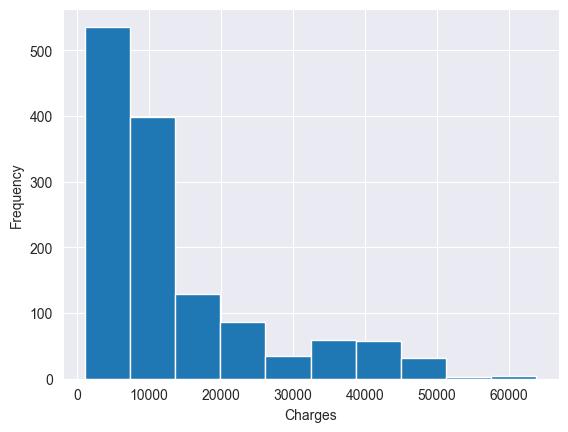

In [29]:
plt.hist(data['charges'])
plt.xlabel('Charges')
plt.ylabel('Frequency')

In [30]:
mean = np.mean(data['charges'])
std = np.std(data['charges'])
print(mean, std)

13270.422265141257 12105.484975561612


In [31]:
data["Z-score-charges"] = (data['charges'] - mean)/std

In [32]:
data.head()

,age,sex,bmi,children,smoker,region,charges,Z-score-charges
0,19,female,27.900,0,yes,southwest,16884.92400,0.298584
1,18,male,33.770,1,no,southeast,1725.55230,-0.953689
2,28,male,33.000,3,no,southeast,4449.46200,-0.728675
3,33,male,22.705,0,no,northwest,21984.47061,0.719843
4,32,male,28.880,0,no,northwest,3866.85520,-0.776802


In [33]:
data[data['Z-score-charges']>3]

,age,sex,bmi,children,smoker,region,charges,Z-score-charges
34,28,male,36.400,1,yes,southwest,51194.55914,3.132806
543,54,female,47.410,0,yes,southeast,63770.42801,4.171663
577,31,female,38.095,1,yes,northeast,58571.07448,3.742159
819,33,female,35.530,0,yes,northwest,55135.40209,3.458348
1146,60,male,32.800,0,yes,southwest,52590.82939,3.248148
1230,52,male,34.485,3,yes,northwest,60021.39897,3.861966
1300,45,male,30.360,0,yes,southeast,62592.87309,4.074389


In [34]:
data[data['Z-score-charges']<-3]

,age,sex,bmi,children,smoker,region,charges,Z-score-charges


In [35]:
data['Z-score-charges'].min() , data['Z-score-charges'].max()

(np.float64(-1.003557345258499), np.float64(4.17166316317004))

In [36]:
outlier_indexes = []

In [37]:
outlier_indexes.extend(data.index[data['Z-score-charges']>3].tolist())

In [38]:
outlier_indexes

[34, 543, 577, 819, 1146, 1230, 1300]

In [39]:
new_data = data.drop(data.index[outlier_indexes])

In [40]:
new_data = new_data.drop('Z-score-charges', axis=1)
new_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Text(0, 0.5, 'Frequency')

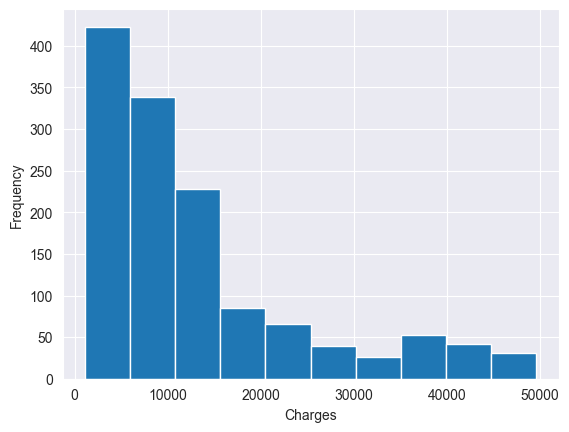

In [41]:
plt.hist(new_data['charges'])
plt.xlabel('Charges')
plt.ylabel('Frequency')